In [15]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as linear_model
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [16]:
data = pd.read_excel(r'credit_data.xlsx')
df1 = pd.DataFrame(data)
print(df1)

        Age  Gender  Income  Credit Score  Credit History Length  \
0        31    Male   36000           604                    487   
1        25    Male   50000           447                    386   
2        62   Other  178000           850                    503   
3        69  Female   46000           668                    349   
4        52    Male  132000           601                    553   
...     ...     ...     ...           ...                    ...   
279851   69    Male   61000           495                    565   
279852   45  Female  124000           850                    476   
279853   33  Female   71000           582                    560   
279854   67    Male  191000           411                    481   
279855   33   Other   18000           474                    374   

        Number of Existing Loans  Loan Amount  Loan Tenure Existing Customer  \
0                              5       109373          221                No   
1                      

In [17]:
# df2 = df1.drop(["sex","smoker","region"],axis = 1)
df2 = df1
df2.isnull()
df3 = df2.dropna()
print(df3)
print(df3.duplicated())
df3 = df3.drop_duplicates()
print(df3)

        Age  Gender  Income  Credit Score  Credit History Length  \
0        31    Male   36000           604                    487   
1        25    Male   50000           447                    386   
2        62   Other  178000           850                    503   
3        69  Female   46000           668                    349   
4        52    Male  132000           601                    553   
...     ...     ...     ...           ...                    ...   
279850   53  Female   77000           467                    268   
279851   69    Male   61000           495                    565   
279852   45  Female  124000           850                    476   
279854   67    Male  191000           411                    481   
279855   33   Other   18000           474                    374   

        Number of Existing Loans  Loan Amount  Loan Tenure Existing Customer  \
0                              5       109373          221                No   
1                      

In [18]:
df4=df3.duplicated(subset=['Age'])
df4 = df3.drop_duplicates(subset=['Age'],keep='last')
print(df4)
df4.reset_index(inplace=True,drop=True)
print(df4)

        Age  Gender  Income  Credit Score  Credit History Length  \
279055   57    Male   44000           661                    114   
279299   20  Female   20000           624                    504   
279419   32  Female   79000           725                    595   
279539   68  Female  198000           396                     27   
279580   49    Male   50000           794                    308   
279582   22  Female   42000           834                    395   
279588   36  Female   93000           850                    412   
279593   30    Male   71000           803                    490   
279613   43  Female   30000           384                    291   
279639   56    Male  153000           471                    214   
279657   26  Female   30000           646                    153   
279669   27  Female   50000           648                     82   
279671   62    Male  180000           652                    490   
279676   39  Female  111000           850       

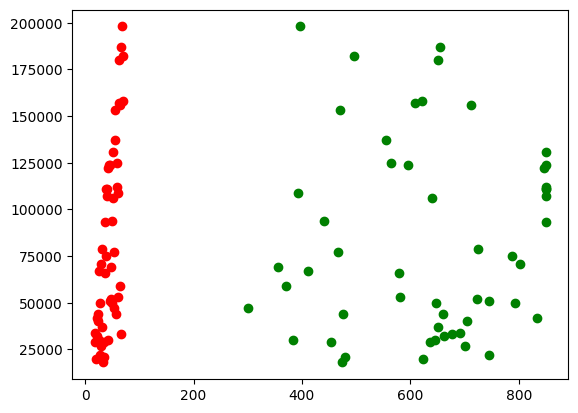

In [19]:
plt.scatter(df4['Age'],df4['Income'],color='red')
plt.scatter(df4['Credit Score'],df4['Income'],color='g')
plt.show()

In [20]:
regr = linear_model.LinearRegression()
x=df4[['Age','Credit Score']]
y = np.asanyarray(df4['Income'])
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = keras.Sequential([
    keras.layers.Input(shape=(20,)), 
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(1, activation='sigmoid') 
])

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
predictions = model.predict(X_test)

Epoch 1/10
25/25 [==============================] - 1s 11ms/step - loss: 0.6764 - accuracy: 0.5663 - val_loss: 0.5657 - val_accuracy: 0.7500
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 0.4990 - accuracy: 0.8213 - val_loss: 0.4737 - val_accuracy: 0.8350
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 0.4133 - accuracy: 0.8675 - val_loss: 0.4232 - val_accuracy: 0.8350
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 0.3657 - accuracy: 0.8750 - val_loss: 0.3940 - val_accuracy: 0.8450
Epoch 5/10
25/25 [==============================] - 0s 4ms/step - loss: 0.3354 - accuracy: 0.8775 - val_loss: 0.3785 - val_accuracy: 0.8450
Epoch 6/10
25/25 [==============================] - 0s 4ms/step - loss: 0.3159 - accuracy: 0.8875 - val_loss: 0.3677 - val_accuracy: 0.8450
Epoch 7/10
25/25 [==============================] - 0s 4ms/step - loss: 0.3033 - accuracy: 0.8888 - val_loss: 0.3613 - val_accuracy: 0.8500
Epoch 8/10
25/25 [=